In [178]:
import itertools
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering, BisectingKMeans, KMeans, MeanShift
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.cluster import SpectralClustering
from hdbscan import HDBSCAN

In [179]:
df = pd.read_csv("Amazon Customer Behavior Survey.csv")

# 1.age= age
# 2.gender= gender
# 3.Purchase_Frequency= How frequently do you make purchases on Amazon?
# 4.Purchase_Categories= What product categories do you typically purchase on Amazon?
# 5.Personalized_Recommendation_Frequency = Have you ever made a purchase based on personalized product recommendations from Amazon?
# 6.Browsing_Frequency =How often do you browse Amazon's website or app?
# 7.Product_Search_Method =How do you search for products on Amazon?
# 8.Search_Result_Exploration =Do you tend to explore multiple pages of search results or focus on the first page?
# 9.Customer_Reviews_Importance =How important are customer reviews in your decision-making process?
# 10.Add_to_Cart_Browsing =Do you add products to your cart while browsing on Amazon?
# 11.Cart_Completion_Frequency =How often do you complete the purchase after adding products to your cart?
# 12.Cart_Abandonment_Factors =What factors influence your decision to abandon a purchase in your cart?
# 13.Saveforlater_Frequency =Do you use Amazon's "Save for Later" feature, and if so, how often?
# 14.Review_Left =Have you ever left a product review on Amazon?
# 15.Review_Reliability =How much do you rely on product reviews when making a purchase?
# 16.Review_Helpfulness =Do you find helpful information from other customers' reviews?
# 17.Personalized_Recommendation_Frequency =How often do you receive personalized product recommendations from Amazon?
# 18.Recommendation_Helpfulness =Do you find the recommendations helpful?
# 19.Rating_Accuracy =How would you rate the relevance and accuracy of the recommendations you receive
# 20.Shopping_Satisfaction =How satisfied are you with your overall shopping experience on Amazon?
# 23.Service_Appreciation =What aspects of Amazon's services do you appreciate the most?
# 24.Improvement_Areas =Are there any areas where you think Amazon can improve?

In [180]:
df.head(10)

Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   
5  2023/06/04 6:01:59 PM GMT+5:30   21             Female   
6  2023/06/04 6:31:41 PM GMT+5:30   22             Female   
7  2023/06/04 7:13:12 PM GMT+5:30   21             Female   
8  2023/06/04 7:23:21 PM GMT+5:30   20             Female   
9  2023/06/04 7:33:12 PM GMT+5:30   23             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   
5  Less than once a month                               Clothing and Fashion   
6  Less than once a month                               Clothing and Fashion   
7       Few times a month      Beauty and Personal Care;Clothing and Fashion   
8  Less than once a month      Beauty and Personal Care;Clothing and Fashion   
9  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                   Yes  Few times a month   
5                                    No             Rarely   
6                                    No             Rarely   
7                                    No             Rarely   
8                             Sometimes  Few times a month   
9                                    No             Rarely   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1               Keyword            Multiple pages   
2               Keyword            Multiple pages   
3               Keyword                First page   
4                Filter            Multiple pages   
5            categories            Multiple pages   
6                Filter            Multiple pages   
7               Keyword            Multiple pages   
8               Keyword                First page   
9               Keyword            Multiple pages   

   Customer_Reviews_Importance  ... Saveforlater_Frequency Review_Left  \
0                            1  ...              Sometimes         Yes   
1                            1  ...                 Rarely          No   
2                            2  ...                 Rarely          No   
3                            5  ...              Sometimes         Yes   
4                            1  ...                 Rarely          No   
5                            1  ...                  Never          No   
6                            1  ...                 Rarely          No   
7                            1  ...                 Rarely          No   
8                            1  ...                  Often          No   
9                            1  ...                 Rarely          No   

  Review_Reliability Review_Helpfulness  \
0       Occasionally                Yes   
1            Heavily                Yes   
2       Occasionally                 No   
3            Heavily                Yes   
4            Heavily                Yes   
5            Heavily                Yes   
6            Heavily                Yes   
7            Heavily          Sometimes   
8 

In [181]:
df.describe()

age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max                                  5.000000          5.000000   

       Shopping_Satisfaction  
count             602.000000  
mean                2.463455  
std                 1.012152  
min                 1.000000  
25%                 2.000000  
50%                 2.000000  
75%                 3.000000  
max                 5.000000

In [182]:
df.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [183]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [184]:
df.dropna(inplace=True)

In [185]:
df = df.drop(["Timestamp"], axis=1)
df = df.drop(["Customer_Reviews_Importance"], axis=1)
df = df.drop(["Personalized_Recommendation_Frequency"], axis=1)

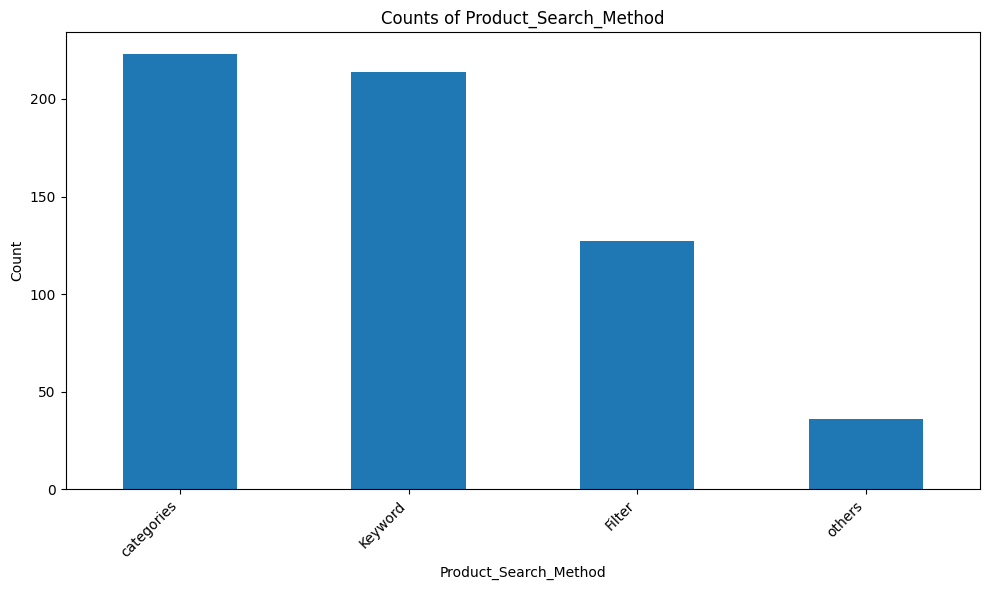

In [186]:
plt.figure(figsize=(10, 6))
df['Product_Search_Method'].value_counts().plot(kind='bar')
plt.title('Counts of Product_Search_Method')
plt.xlabel('Product_Search_Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

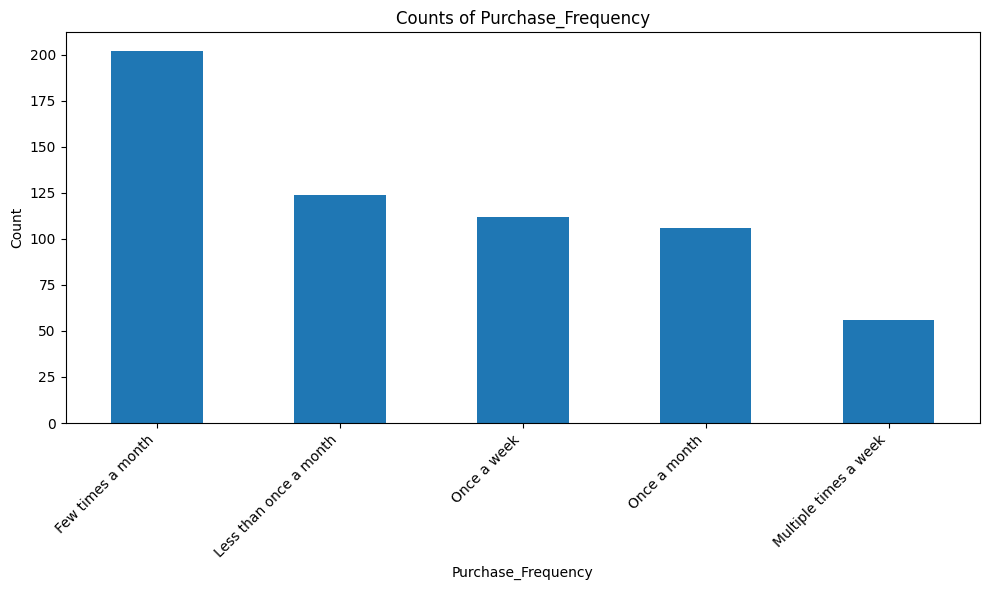

In [187]:
plt.figure(figsize=(10, 6))
df['Purchase_Frequency'].value_counts().plot(kind='bar')
plt.title('Counts of Purchase_Frequency')
plt.xlabel('Purchase_Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

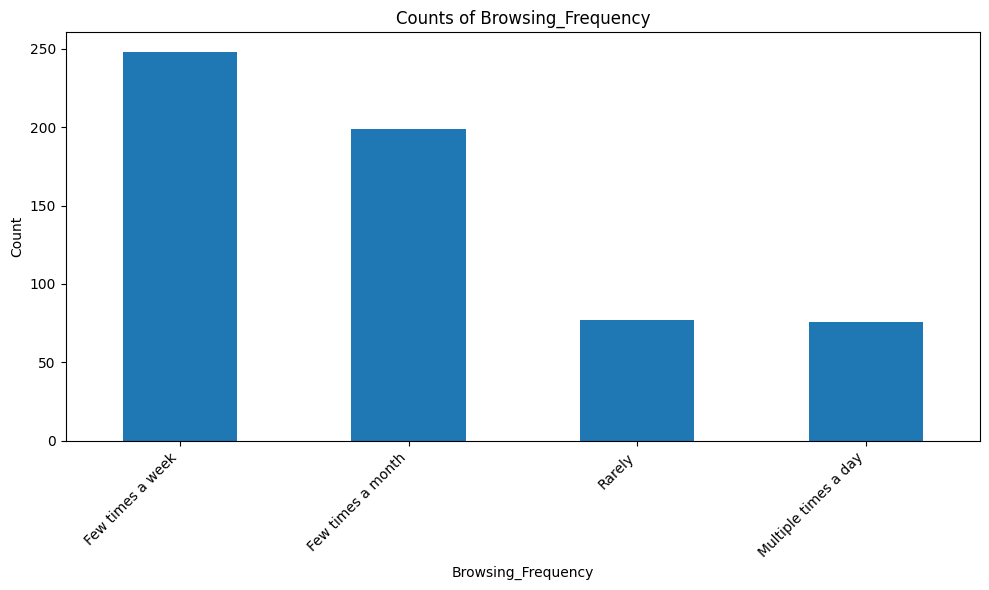

In [188]:
plt.figure(figsize=(10, 6))
df['Browsing_Frequency'].value_counts().plot(kind='bar')
plt.title('Counts of Browsing_Frequency')
plt.xlabel('Browsing_Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [189]:
df["Improvement_Areas"] = df["Improvement_Areas"].map({'.': 'Nothing',
 'Add more familiar brands to the list': "Offer",
 'Customer service responsiveness': "Customer Service",
 "I don't have any problem with Amazon": 'Nothing',
 'I have no problem with Amazon yet. But others tell me about the refund issues ': 'Refund',
 'Irrelevant product suggestions': 'Product suggestion',
 'Nil': 'Nothing',
 'No problems with Amazon': 'Nothing',
 'Nothing': 'Nothing',
 'Product quality and accuracy': "Offer",
 'Quality of product is very poor according to the big offers': "Offer",
 'Reducing packaging waste': "Nothing",
 'Scrolling option would be much better than going to next page': "UI",
 'Shipping speed and reliability': "Shipping",
 'UI': "UI",
 'User interface ': "UI",
 'User interface of app': "UI",
 'better app interface and lower shipping charges': "UI"})

In [190]:
label_mappings = {}
columns_to_encode = ['Service_Appreciation', 'Improvement_Areas', 'Review_Left', "Gender"]
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [191]:
bins = [0, 18, 30, 40, 50, 60, 100]  # Example ranges: 0-18, 19-30, 31-40, 41-50, 51-60, 61-100
labels = [1, 2, 3, 4, 5, 6]
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [192]:
df = pd.get_dummies(data=df, columns=['Product_Search_Method'],  dtype='float64')
df['Categories'] = df['Purchase_Categories'].apply(lambda x: x.split(';'))
one_hot_encoded = df['Categories'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(['Purchase_Categories', 'Categories'], axis=1, inplace=True)
df.head(5)

age  Gender      Purchase_Frequency Browsing_Frequency  \
0   2       0       Few times a month   Few times a week   
1   2       0            Once a month  Few times a month   
2   2       3       Few times a month  Few times a month   
3   2       0            Once a month  Few times a month   
4   2       0  Less than once a month  Few times a month   

  Search_Result_Exploration Add_to_Cart_Browsing Cart_Completion_Frequency  \
0            Multiple pages                  Yes                 Sometimes   
1            Multiple pages                  Yes                     Often   
2            Multiple pages                  Yes                 Sometimes   
3                First page                Maybe                 Sometimes   
4            Multiple pages                  Yes                 Sometimes   

         Cart_Abandonment_Factors Saveforlater_Frequency  Review_Left  ...  \
0  Found a better price elsewhere              Sometimes            1  ...   
1             High shipping costs                 Rarely            0  ...   
2  Found a better price elsewhere                 Rarely            0  ...   
3  Found a better price elsewhere              Sometimes            1  ...   
4             High shipping costs                 Rarely            0  ...   

  Improvement_Areas Product_Search_Method_Filter  \
0                 1                          0.0   
1                 1                          0.0   
2                 2                          0.0   
3                 2                          0.0   
4                 2                          1.0   

   Product_Search_Method_Keyword Product_Search_Method_categories  \
0                            1.0                              0.0   
1                            1.0                              0.0   
2                            1.0                              0.0   
3                            1.0                              0.0   
4                            0.0                              0.0   

   Product_Search_Method_others  Beauty and Personal Care  \
0                           0.0                       1.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       1.0   
4                           0.0                       1.0   

   Clothing and Fashion  Groceries and Gourmet Food  others  Home and Kitchen  
0                   0.0                         0.0     0.0               0.0  
1                   1.0                         0.0     0.0               0.0  
2                   1.0                         1.0     0.0               0.0  
3                   1.0                         0.0     1.0               0.0  
4                   1.0                         0.0     0.0               0.0  

[5 rows x 27 columns]

In [193]:
df["Purchase_Frequency"] = df["Purchase_Frequency"].map({'Few times a month': 2, 'Once a month': 1, 'Less than once a month': 0,
       'Multiple times a week': 4, 'Once a week': 3})


df["Browsing_Frequency"] = df["Browsing_Frequency"].map({'Few times a week': 2, 'Few times a month': 1, 'Rarely': 0,
       'Multiple times a day': 3})

df["Search_Result_Exploration"] = df["Search_Result_Exploration"].map({'Multiple pages': 1, 'First page': 0})

df["Add_to_Cart_Browsing"] = df["Add_to_Cart_Browsing"].map({'Yes': 2, 'Maybe': 1, 'No': 0})

df["Cart_Completion_Frequency"] = df["Cart_Completion_Frequency"].map({'Sometimes': 2, 'Often': 3, 'Rarely': 1, 'Never': 0, 'Always': 4})

df["Review_Helpfulness"] = df["Review_Helpfulness"].map({'Yes': 2, 'No': 0, 'Sometimes': 1})

df["Recommendation_Helpfulness"] = df["Recommendation_Helpfulness"].map({'Yes': 2, 'No': 0, 'Sometimes': 1})

df["Cart_Abandonment_Factors"] = df["Cart_Abandonment_Factors"].map({'Found a better price elsewhere': 0, 'High shipping costs': 1, 'Changed my mind or no longer need the item': 2, 'others': 3})

df["Review_Reliability"] = df["Review_Reliability"].map({'Occasionally': 2, 'Heavily': 4, 'Moderately': 3, 'Never': 0, 'Rarely': 1})

df["Saveforlater_Frequency"] = df["Saveforlater_Frequency"].map({'Sometimes': 2, 'Often': 3, 'Rarely': 1, 'Never': 0, 'Always': 4})

df.head(5)

age  Gender  Purchase_Frequency  Browsing_Frequency  \
0   2       0                   2                   2   
1   2       0                   1                   1   
2   2       3                   2                   1   
3   2       0                   1                   1   
4   2       0                   0                   1   

   Search_Result_Exploration  Add_to_Cart_Browsing  Cart_Completion_Frequency  \
0                          1                     2                          2   
1                          1                     2                          3   
2                          1                     2                          2   
3                          0                     1                          2   
4                          1                     2                          2   

   Cart_Abandonment_Factors  Saveforlater_Frequency  Review_Left  ...  \
0                         0                       2            1  ...   
1                         1                       1            0  ...   
2                         0                       1            0  ...   
3                         0                       2            1  ...   
4                         1                       1            0  ...   

   Improvement_Areas  Product_Search_Method_Filter  \
0                  1                           0.0   
1                  1                           0.0   
2                  2                           0.0   
3                  2                           0.0   
4                  2                           1.0   

   Product_Search_Method_Keyword  Product_Search_Method_categories  \
0                            1.0                               0.0   
1                            1.0                               0.0   
2                            1.0                               0.0   
3                            1.0                               0.0   
4                            0.0                               0.0   

   Product_Search_Method_others  Beauty and Personal Care  \
0                           0.0                       1.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       1.0   
4                           0.0                       1.0   

   Clothing and Fashion  Groceries and Gourmet Food  others  Home and Kitchen  
0                   0.0                         0.0     0.0               0.0  
1                   1.0                         0.0     0.0               0.0  
2                   1.0                         1.0     0.0               0.0  
3                   1.0                         0.0     1.0               0.0  
4                   1.0                         0.0     0.0               0.0  

[5 rows x 27 columns]

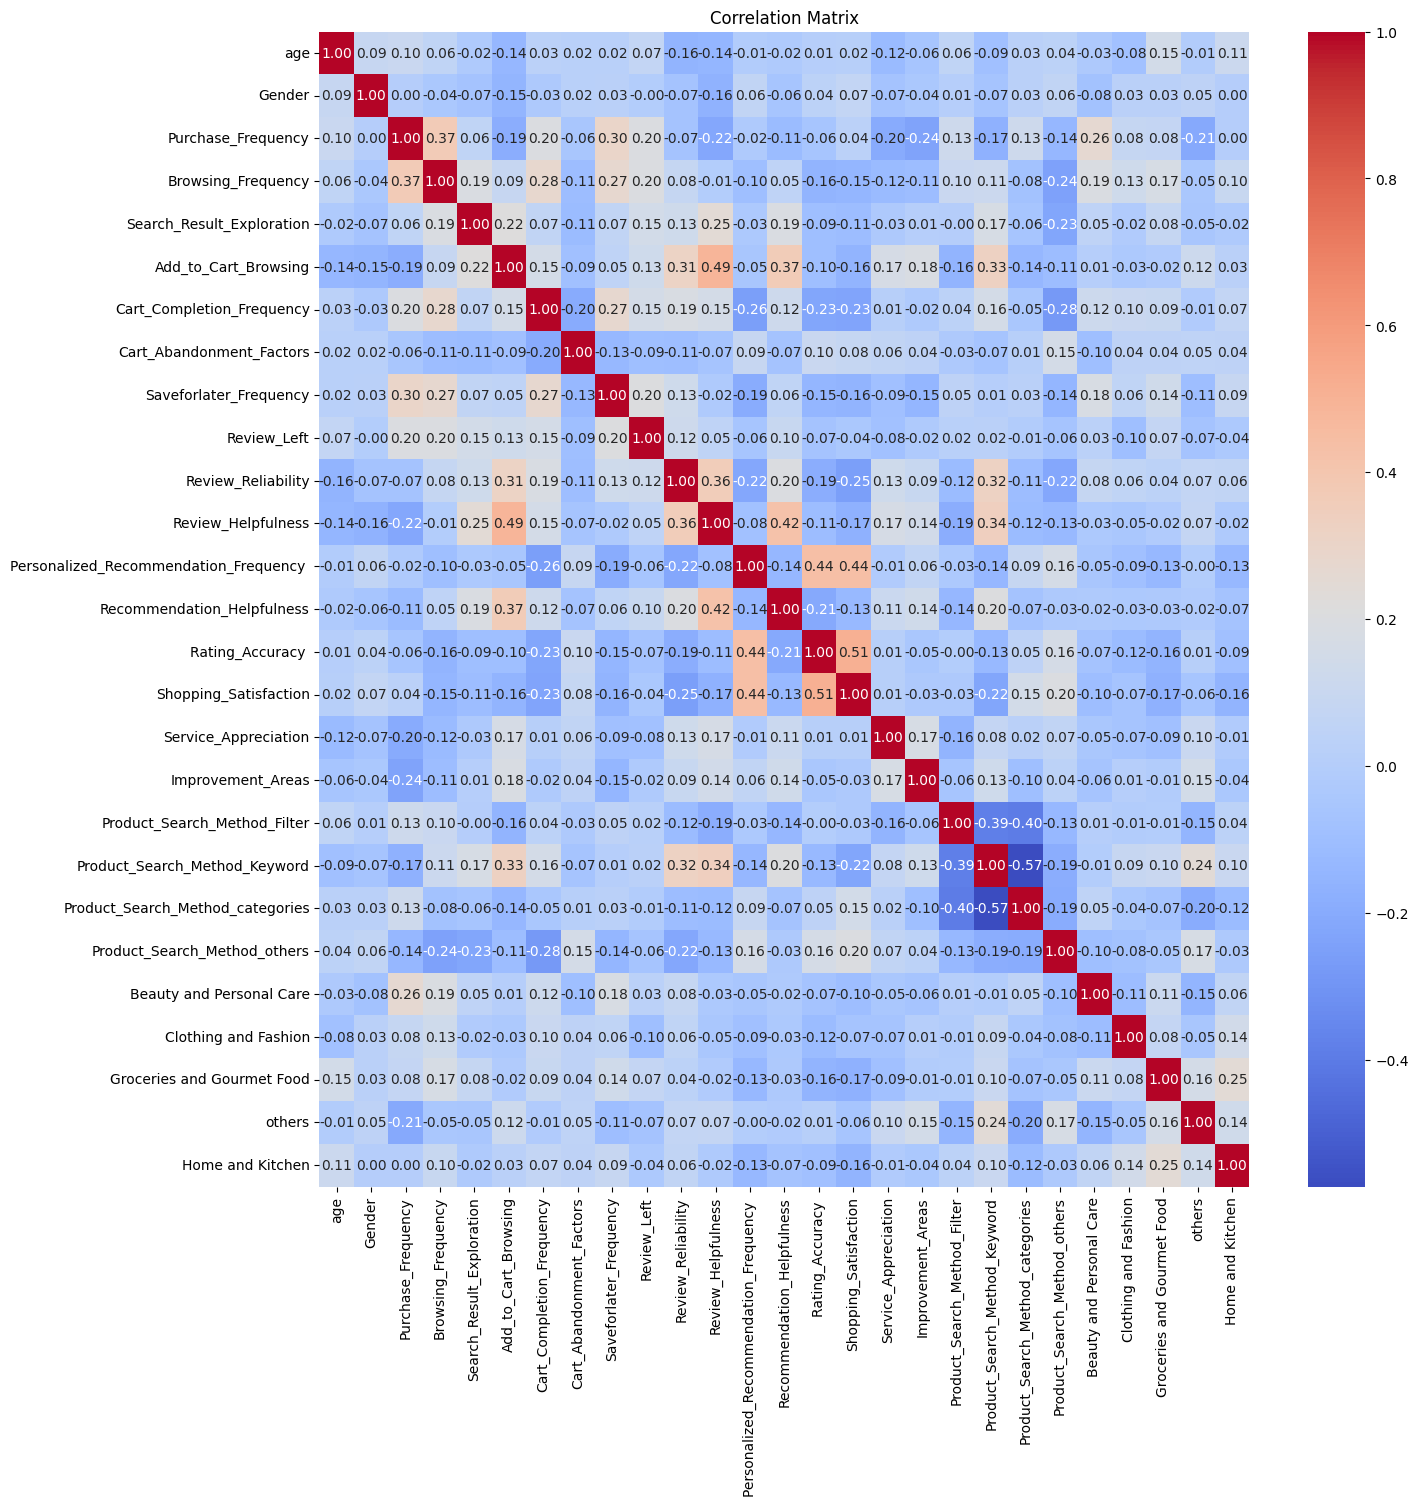

In [194]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [195]:
df = df.drop(["Rating_Accuracy "], axis=1)
df = df.drop(["Review_Helpfulness"], axis=1)
df = df.drop(["Product_Search_Method_categories"], axis=1)

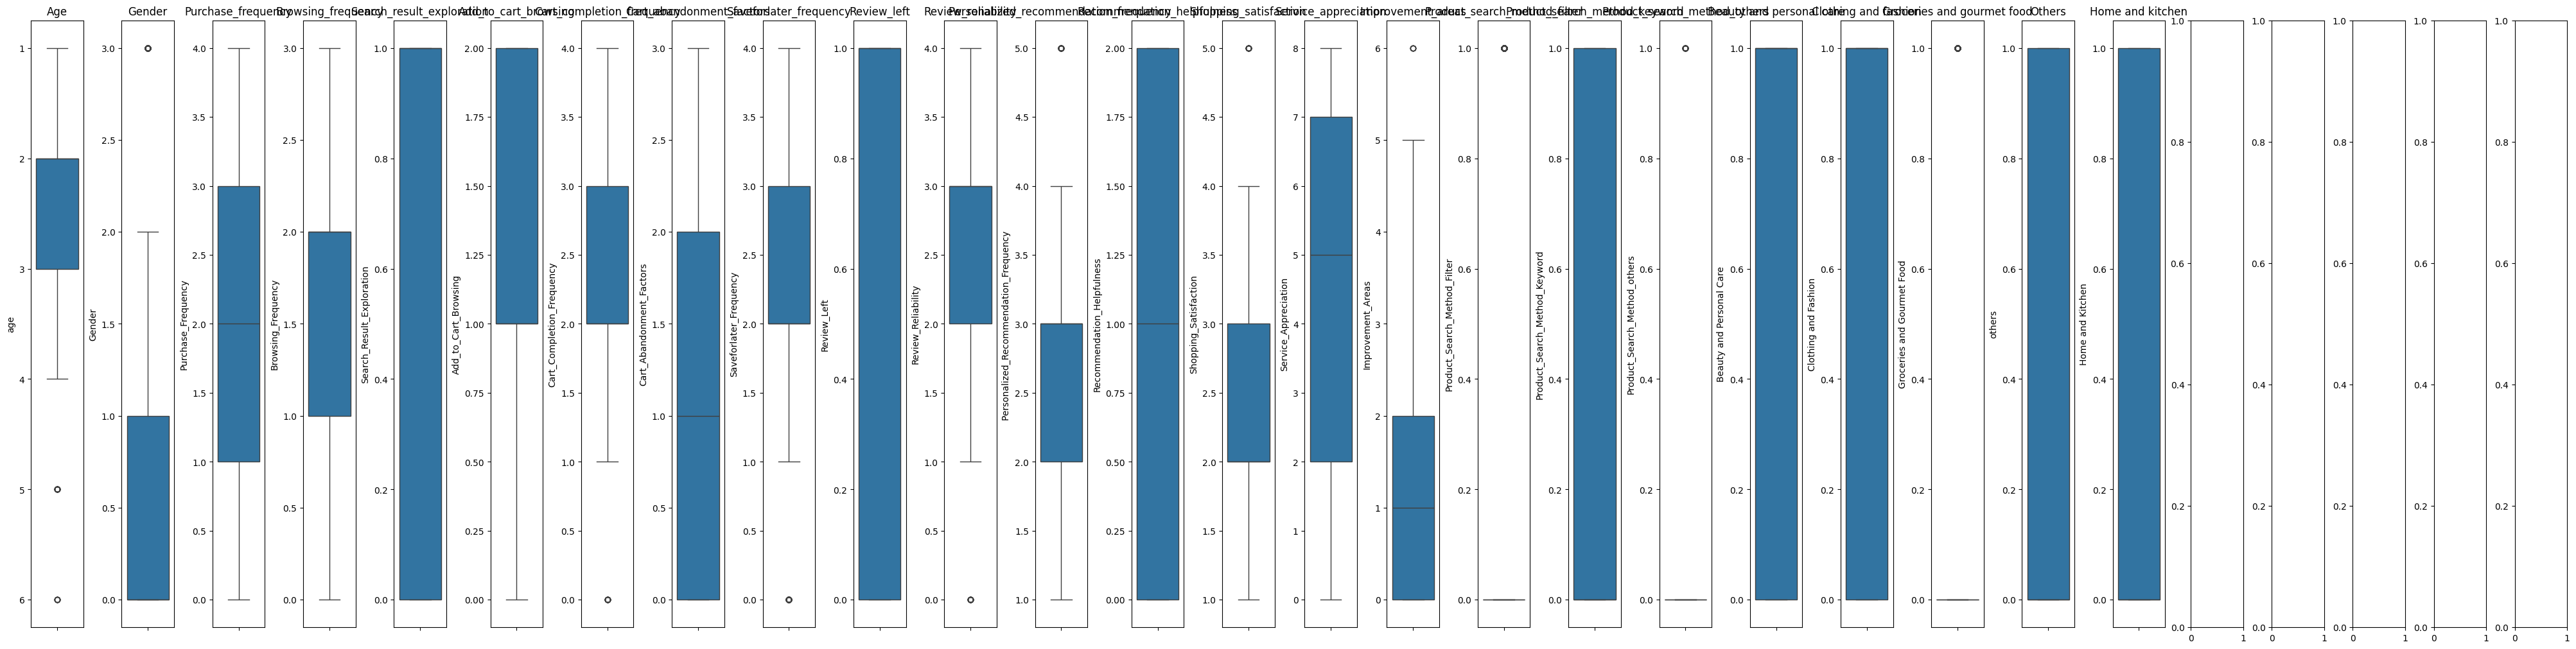

In [196]:
fig, axs = plt.subplots(1, 29,
                        figsize=(40, 10), constrained_layout=True)
for i, f in enumerate(df):
    sns.boxplot(y=f,  data=df,  ax=axs[i])
    axs[i].set_title(f.capitalize())
plt.show()

In [197]:
scaler = StandardScaler()
#scaler = MinMaxScaler((-1, 1))
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [198]:
pca = PCA(n_components=10)
pca.fit_transform(df_standardized)
pca.explained_variance_ratio_.cumsum()

array([0.12892867, 0.23489768, 0.303229  , 0.35772871, 0.40644743,
       0.4536295 , 0.49916821, 0.54121426, 0.58157275, 0.61914526])

In [199]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(df_standardized)
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])

In [200]:
results = pd.DataFrame(columns=['Model', 'Silhouette Score', 'Calinski-Harabasz Score'])
results.set_index('Model', inplace=True)

def addres(results, model, X, clusters):
    results.loc[model, 'Silhouette Score'] = silhouette_score(X, clusters, sample_size=10000)
    results.loc[model, 'Calinski-Harabasz Score'] = calinski_harabasz_score(X, clusters)
    display(results.loc[[model]])

In [201]:
def reverse_dict(d):
    return 

def plot_cluster_pie_charts(clusters, data, scaler, label , label_mapping, n_clusters):
    label_mapping = {v: k for k, v in label_mapping.items()}
    new_clusters_data = [data[clusters == i] for i in range(n_clusters)]
    all_values = df[label].unique()
    all_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6', '#959bf6', '#b0b326', '#dd431a']
    valcol = dict()
    c = 0
    for val in all_values:
        valcol[val] = all_colors[c]
        c += 1
    plt.figure(figsize=(5*n_clusters, n_clusters))
    for i, cluster in enumerate(new_clusters_data):
        plt.subplot(1, n_clusters, i+1)
        cluster = pd.DataFrame(
            scaler.inverse_transform(cluster), columns=data.columns)
        value_count = cluster[label].value_counts()
        value_count.sort_index(inplace=True)
        labels = [label_mapping[j] for j in value_count.index.round().astype(int)]
        cluster_color = []
        for l in value_count.index.round().astype(int):
            cluster_color.append(valcol[l])
        plt.pie(value_count, labels=labels, autopct='%1.1f%%', colors=cluster_color)
        plt.title(f'Cluster {i+1}')
    
    plt.suptitle(label)
    plt.tight_layout()
    plt.show()

def plot_cluster_pie_charts2(clusters, data, scaler, label_column, n_clusters):
    new_clusters_data = [data[clusters == i] for i in range(n_clusters)]
    plt.figure(figsize=(5*n_clusters, n_clusters))
    for i, cluster in enumerate(new_clusters_data):
        plt.subplot(1, n_clusters, i+1)
        cluster = pd.DataFrame(scaler.inverse_transform(cluster), columns=data.columns)
    
        relevant_columns = [col for col in cluster.columns if col.startswith(label_column)]
        cluster_label_counts = cluster[relevant_columns].sum().rename(lambda x: x.split('_')[-1])

        labels = cluster_label_counts.index
        sizes = cluster_label_counts.values

        plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
        plt.title(f'Cluster {i+1}')

    plt.suptitle(label_column)
    plt.tight_layout()
    plt.show()

def plot_3d(X_pca, labels, title='3D PCA Cluster Plot'):
    fig = px.scatter_3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2], color=labels,
                        labels={'x': 'PCA 0',
                                'y': 'PCA 1', 'z': 'PCA 2'},
                        title=title)
    fig.update_traces(marker=dict(size=3))
    fig.show()


def plot_feature_importance(df, clusters):
    centroids = df.groupby(clusters).mean()
    feature_importance = centroids.std(axis=0)
    
    plt.figure(figsize=(10, 5))
    plt.bar(df.columns, feature_importance)
    plt.xticks(rotation=90)
    plt.title('Feature Importance Based on Centroids')
    plt.xlabel('Features')
    plt.ylabel('Feature Importance')
    plt.show()

    return feature_importance

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

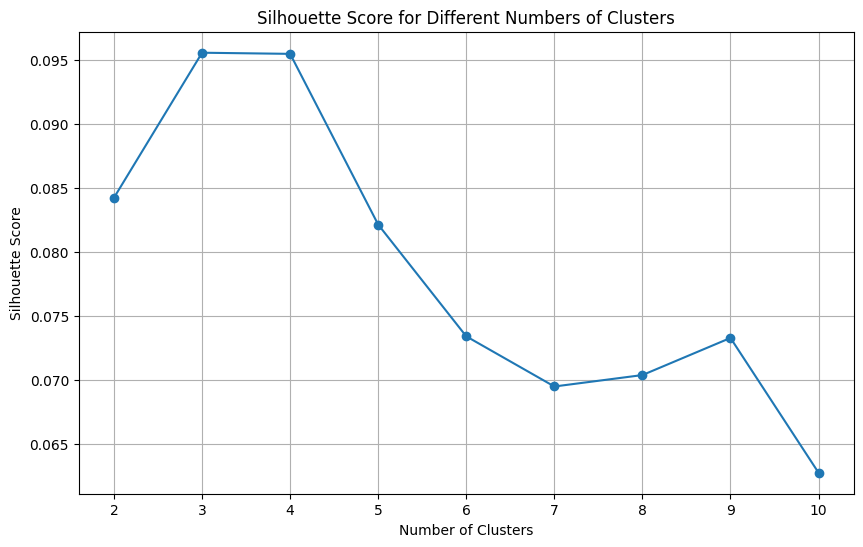

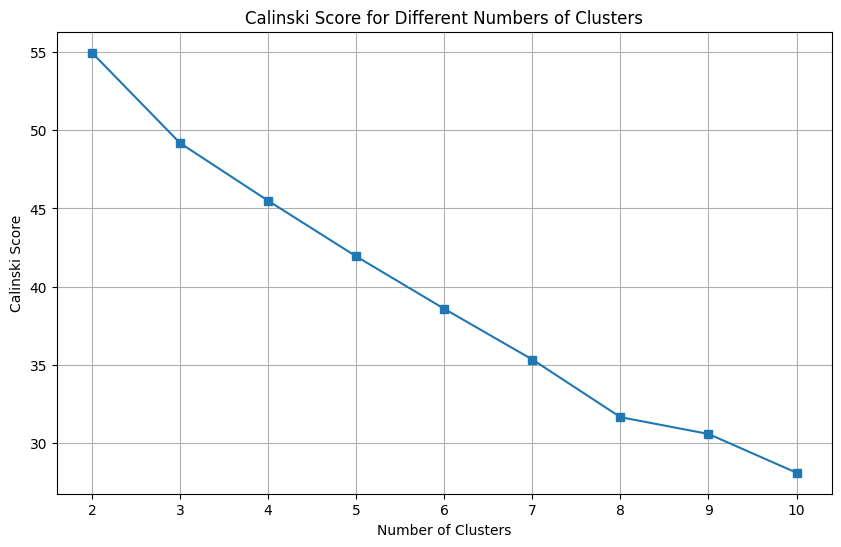

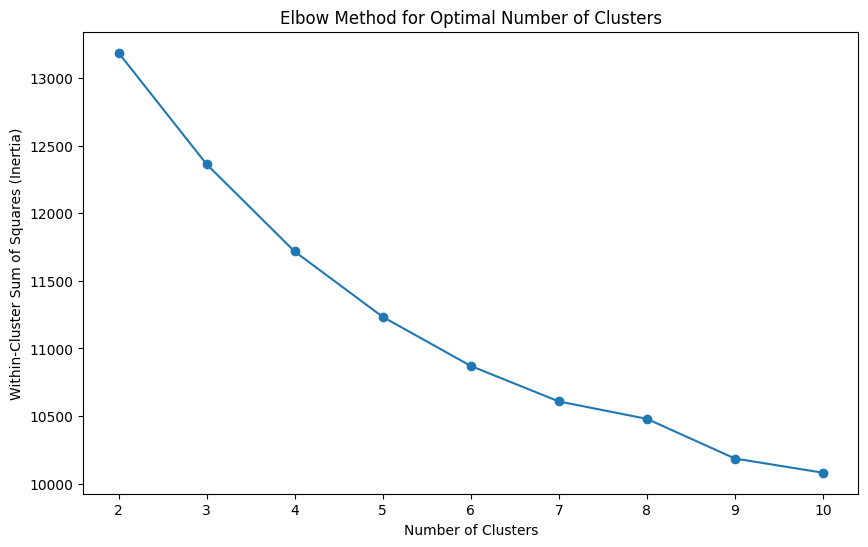

In [202]:
cluster_range = range(2, 11)
silhouette_scores = []
inertia_values = []
calinski_values = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_standardized)
    
    silhouette_avg = silhouette_score(df_standardized, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    calinski_avg = calinski_harabasz_score(df_standardized, cluster_labels)
    calinski_values.append(calinski_avg)

    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', label='Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, calinski_values, marker='s', linestyle='-', label='Calinski Score')
plt.title('Calinski Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score Calinski-Harabasz Score
Model                                          
kmeans         0.095508               45.489806

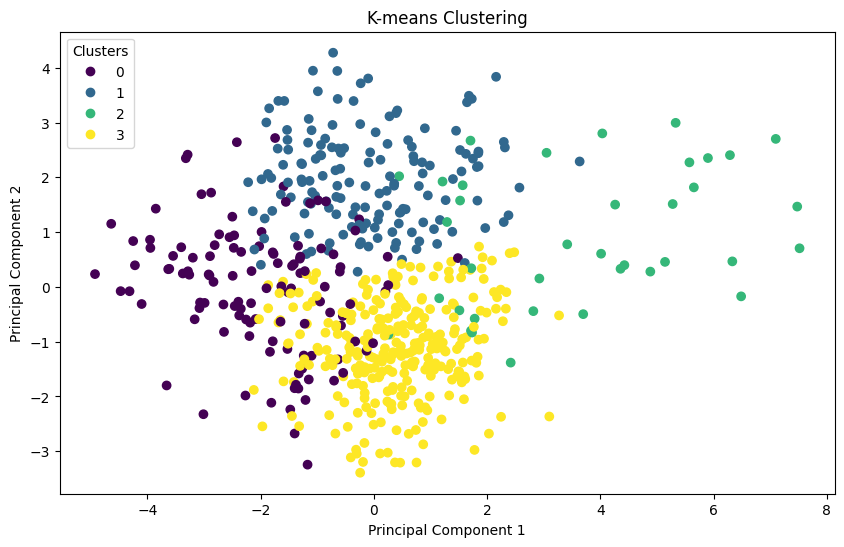

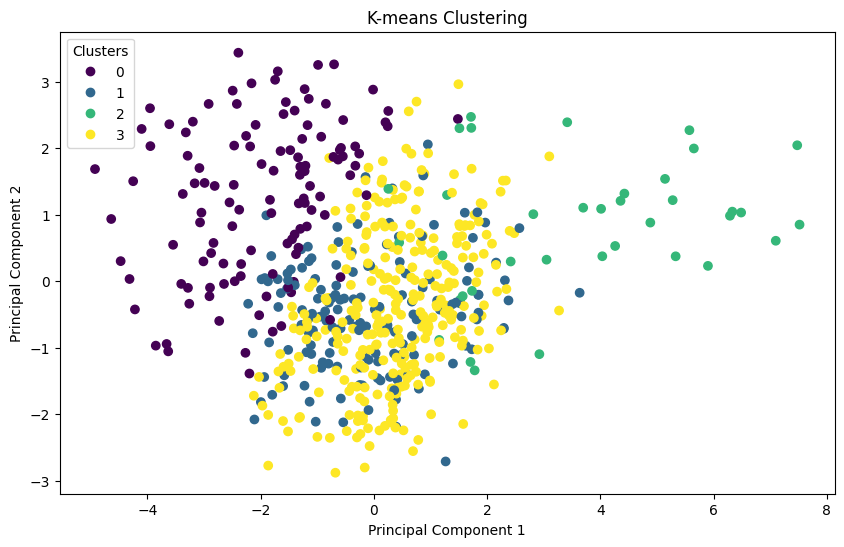

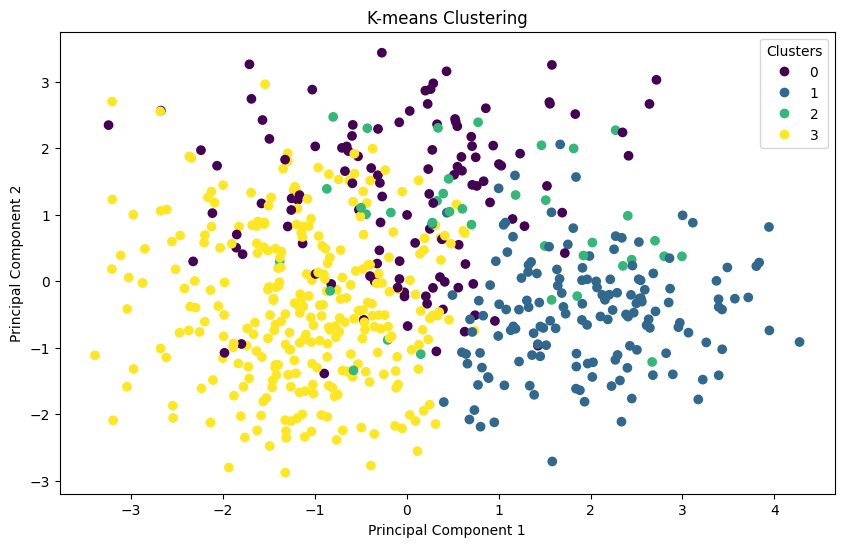

In [203]:
# KMEANS

n_clusters = 4
kmeans = KMeans(n_clusters, random_state=42) 
clusters = kmeans.fit_predict(df_standardized)

addres(results, 'kmeans', df_standardized, clusters)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC3'], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC2'], df_pca['PC3'], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

plot_3d(x_pca, clusters)

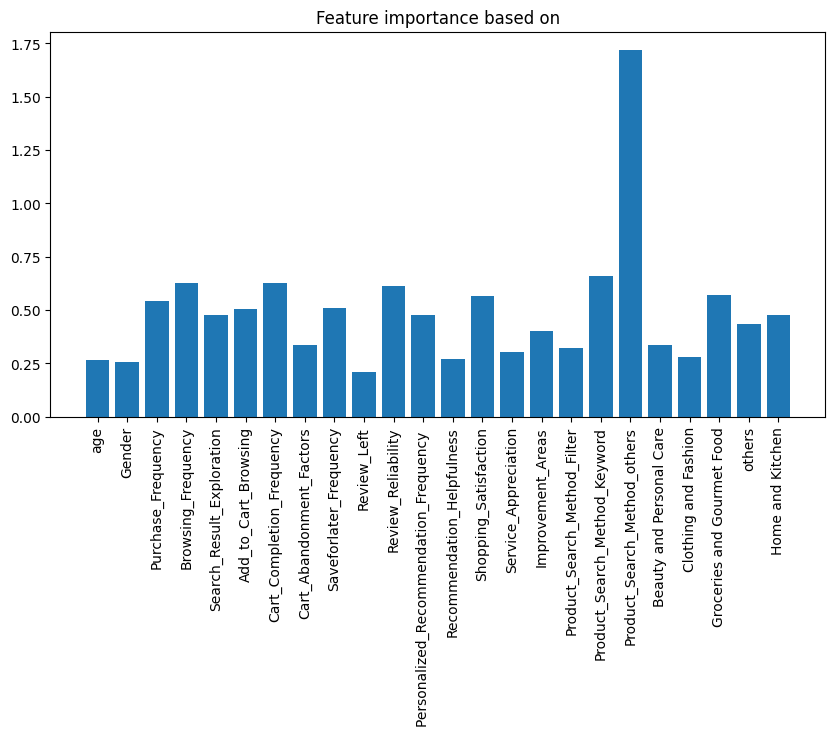

In [204]:
feature_importance = kmeans.cluster_centers_.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df_standardized.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on')
plt.show()

In [205]:
# KMEANS IMPORTANT FEATURES
nonimportant_columns = df.columns[feature_importance <= 0.43] 
important_columns = df.columns[feature_importance > 0.43]
display(important_columns)
display(nonimportant_columns)
df_important = df.drop(columns=nonimportant_columns)

Index(['Purchase_Frequency', 'Browsing_Frequency', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability',
       'Personalized_Recommendation_Frequency ', 'Shopping_Satisfaction',
       'Product_Search_Method_Keyword', 'Product_Search_Method_others',
       'Groceries and Gourmet Food', 'others', 'Home and Kitchen'],
      dtype='object')

Index(['age', 'Gender', 'Cart_Abandonment_Factors', 'Review_Left',
       'Recommendation_Helpfulness', 'Service_Appreciation',
       'Improvement_Areas', 'Product_Search_Method_Filter',
       'Beauty and Personal Care', 'Clothing and Fashion'],
      dtype='object')

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

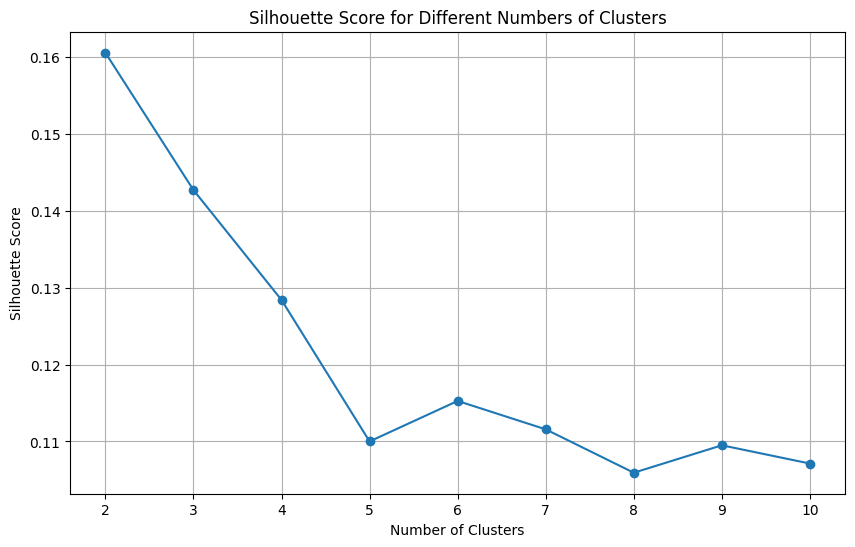

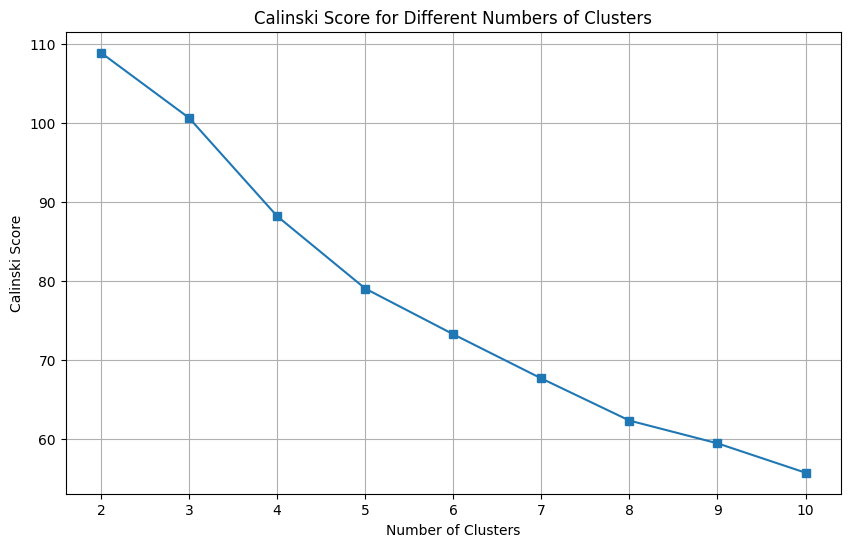

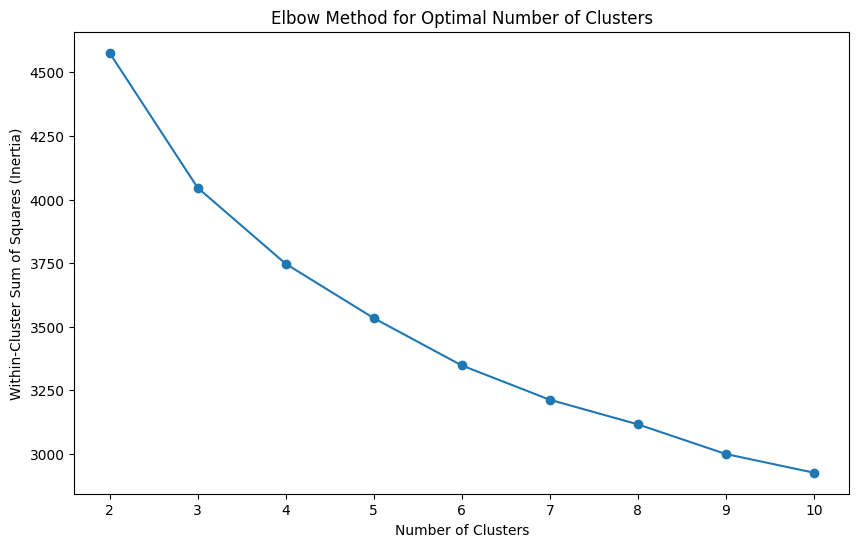

In [206]:
cluster_range = range(2, 11)
silhouette_scores = []
inertia_values = []
calinski_values = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_important)
    
    silhouette_avg = silhouette_score(df_important, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    calinski_avg = calinski_harabasz_score(df_important, cluster_labels)
    calinski_values.append(calinski_avg)

    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', label='Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, calinski_values, marker='s', linestyle='-', label='Calinski Score')
plt.title('Calinski Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [207]:
n_clusters=3
kmeans = KMeans(n_clusters, random_state=42) 
clusters = kmeans.fit_predict(df_important)

addres(results, 'kmeans imp', df_important, clusters)
plot_3d(x_pca, clusters)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score Calinski-Harabasz Score
Model                                              
kmeans imp         0.142675              100.620289

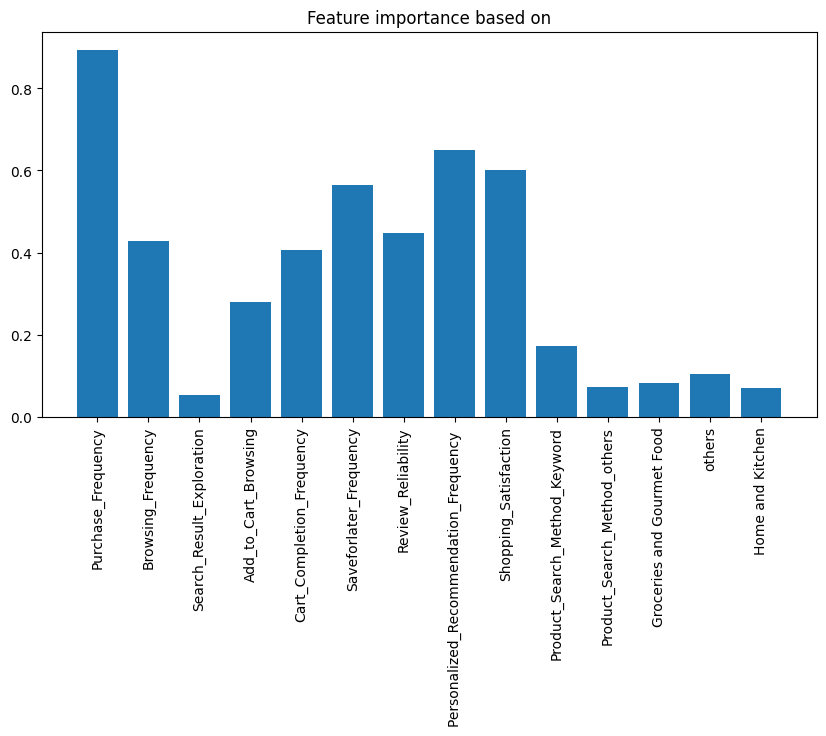

In [208]:
feature_importance = kmeans.cluster_centers_.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df_important.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on')
plt.show()

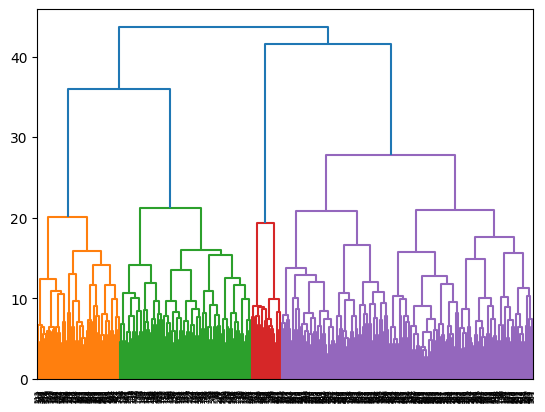

In [209]:
linkage_matrix = shc.linkage(df_standardized.values, 
            method='ward')
shc.dendrogram(linkage_matrix)
plt.show()

Silhouette Score  \
Model                                                        
Hierarchical (dendrogram cut height = 30)         0.085223   

                                          Calinski-Harabasz Score  
Model                                                              
Hierarchical (dendrogram cut height = 30)               40.985684

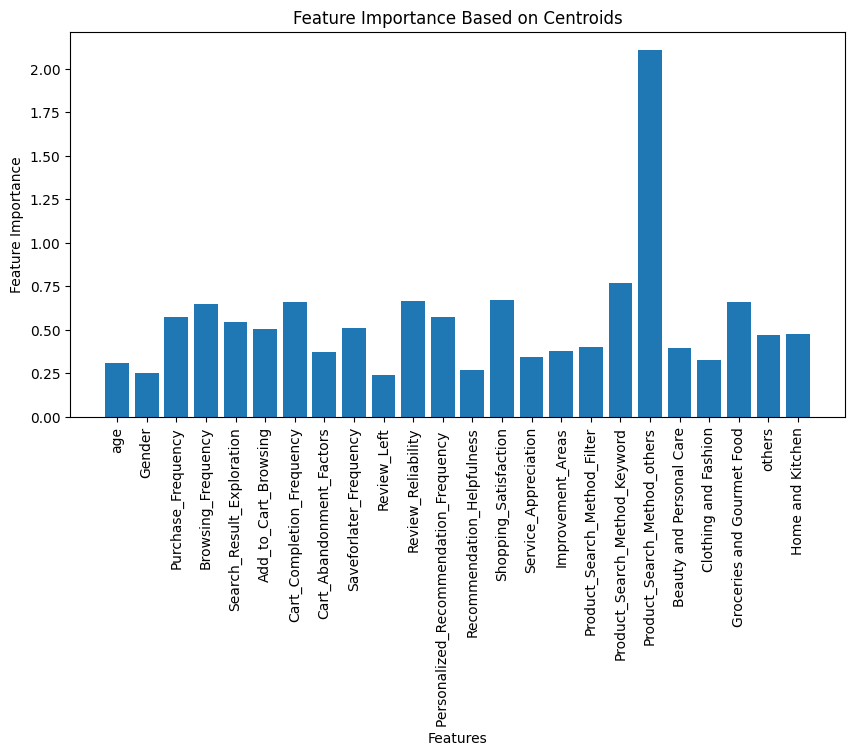

Silhouette Score  \
Model                                                        
Hierarchical (dendrogram cut height = 25)         0.064417   

                                          Calinski-Harabasz Score  
Model                                                              
Hierarchical (dendrogram cut height = 25)               36.682905

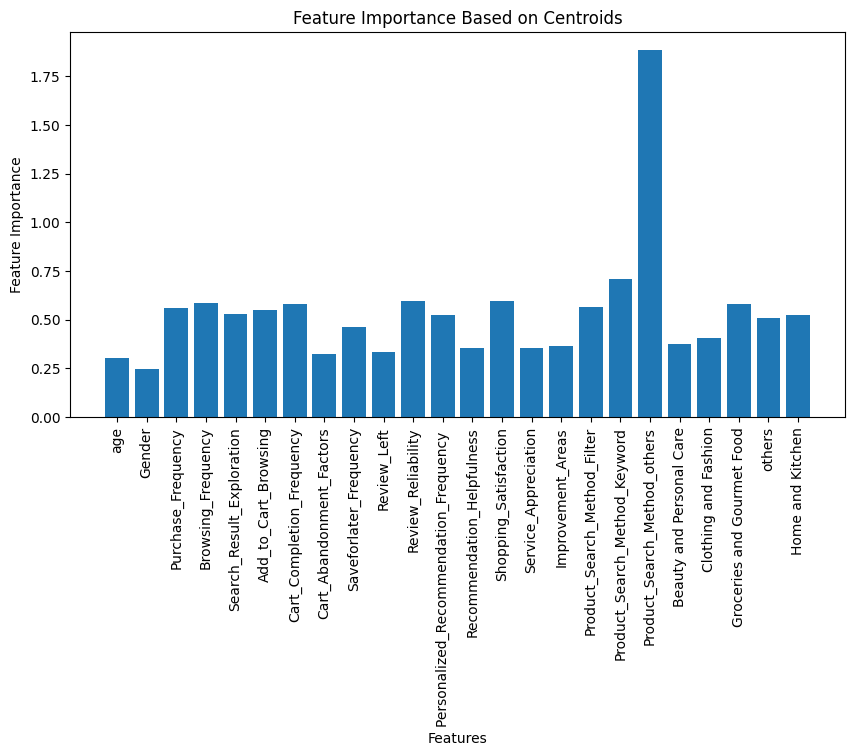

Silhouette Score  \
Model                                                        
Hierarchical (dendrogram cut height = 23)         0.064417   

                                          Calinski-Harabasz Score  
Model                                                              
Hierarchical (dendrogram cut height = 23)               36.682905

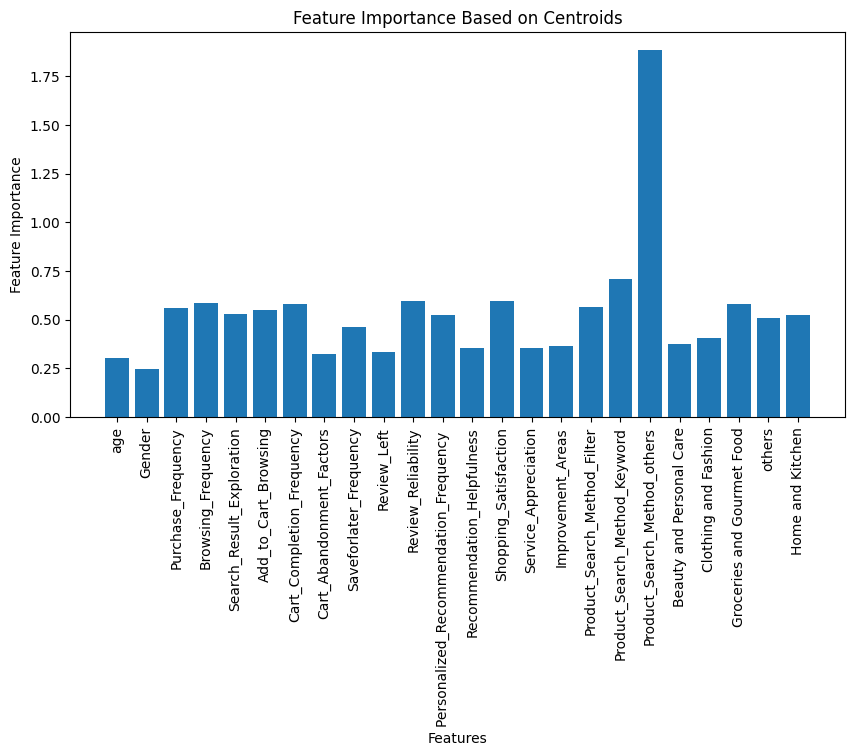

Silhouette Score  \
Model                                                        
Hierarchical (dendrogram cut height = 20)         0.043831   

                                          Calinski-Harabasz Score  
Model                                                              
Hierarchical (dendrogram cut height = 20)               25.652059

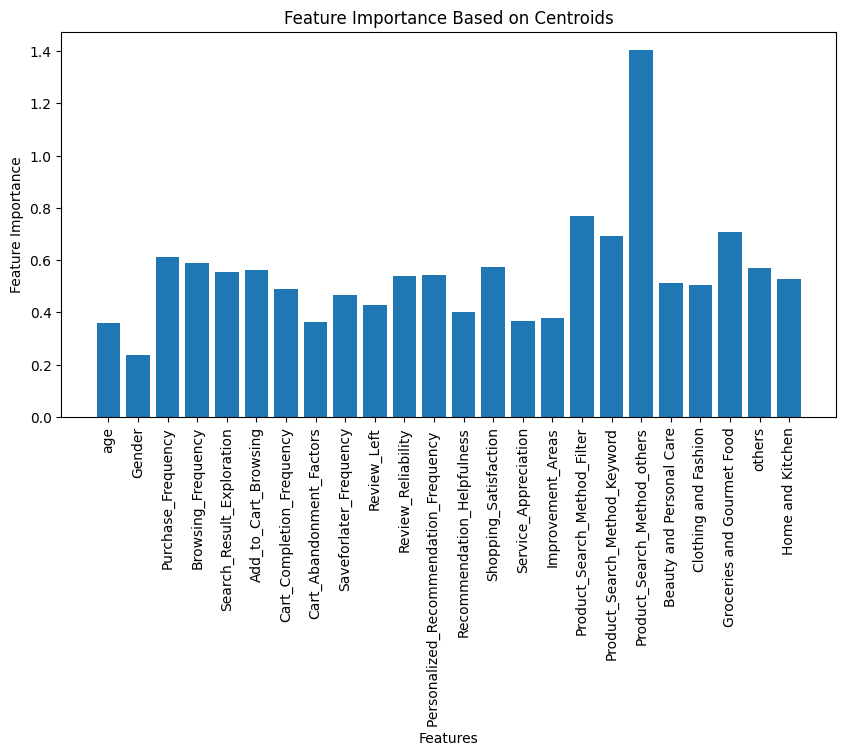

In [210]:
for cut_height in [30, 25, 23, 20]:
    clusters = shc.fcluster(linkage_matrix, cut_height, criterion='distance')
    plot_3d(x_pca, clusters, f'Cut height: {cut_height}')
    addres( results, f'Hierarchical (dendrogram cut height = {cut_height})', df_standardized, clusters)
    plot_feature_importance(df_standardized, clusters-1)

In [211]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
clusters_agg = agg_clustering.fit_predict(df_standardized)
addres(results, 'AgglomerativeClustering', df_standardized, clusters_agg)
plot_3d(x_pca, clusters_agg)

Silhouette Score Calinski-Harabasz Score
Model                                                           
AgglomerativeClustering         0.085223               40.985684

In [212]:
gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(df_standardized)
addres(results, 'GaussianMixture', df_standardized, clusters)
plot_3d(x_pca, clusters)

Silhouette Score Calinski-Harabasz Score
Model                                                   
GaussianMixture         0.072609               37.511568

In [213]:
spectral_clustering = SpectralClustering(n_clusters=3,eigen_solver='lobpcg', affinity="nearest_neighbors", random_state=42)
clusters_spectral = spectral_clustering.fit_predict(df_standardized)
addres(results, 'SpectralClustering', df_standardized, clusters_spectral)
plot_3d(x_pca, clusters_spectral)

Silhouette Score Calinski-Harabasz Score
Model                                                      
SpectralClustering         0.092465                43.98621

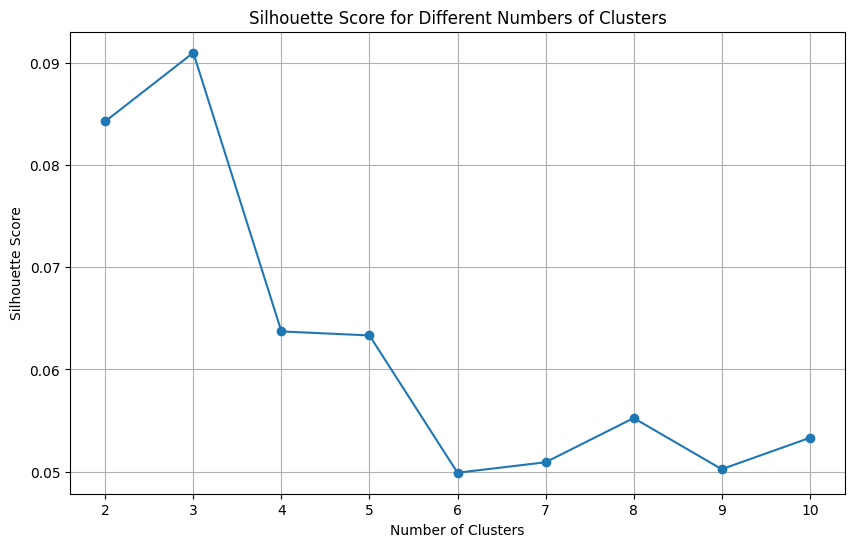

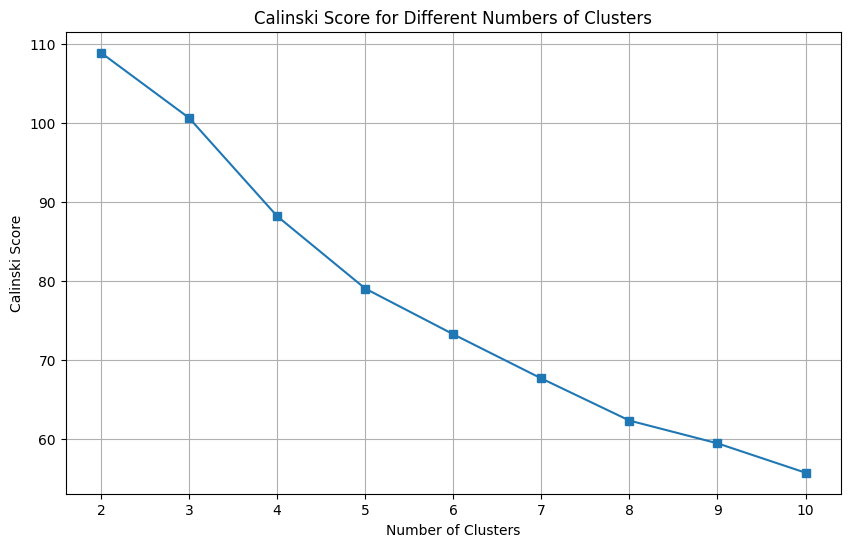

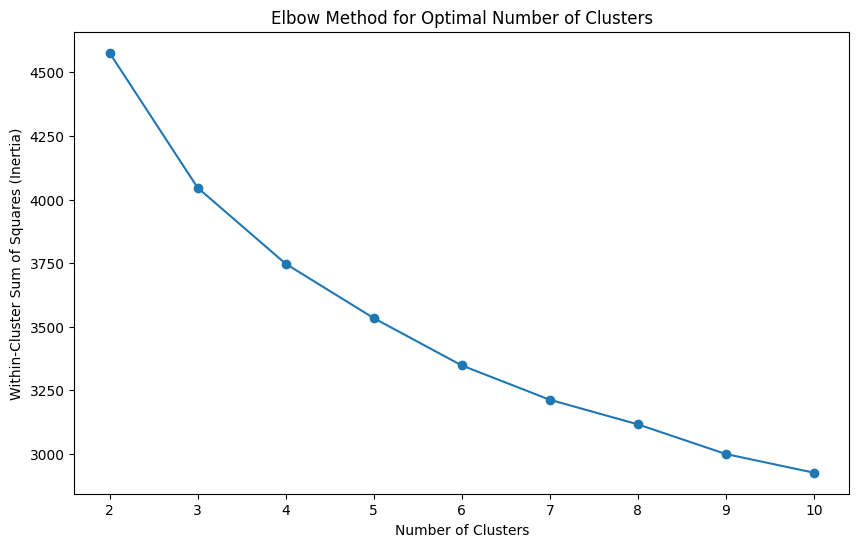

In [214]:
cluster_range = range(2, 11)
silhouette_scores = []
for n_clusters in cluster_range:
    bisecting_kmeans = BisectingKMeans(n_clusters=n_clusters)
    bisecting_kmeans.fit(df_standardized)
    silhouette_avg = silhouette_score(df_standardized, bisecting_kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', label='Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, calinski_values, marker='s', linestyle='-', label='Calinski Score')
plt.title('Calinski Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2 

In [215]:
bisecting_kmeans = BisectingKMeans(n_clusters=optimal_n_clusters)
bisecting_kmeans.fit(df_standardized)
bisecting_clusters = bisecting_kmeans.labels_
addres(results, 'BisectingKMeans', df_standardized, bisecting_clusters)
plot_3d(x_pca, bisecting_clusters)

Silhouette Score Calinski-Harabasz Score
Model                                                   
BisectingKMeans         0.090325               46.902373

In [216]:
hdbscan_model = HDBSCAN(min_cluster_size=optimal_n_clusters)
hdbscan_model.fit(df_standardized)
hdbscan_clusters = hdbscan_model.labels_
addres(results, 'HDBSCAN', df_standardized, hdbscan_clusters)
plot_3d(x_pca, hdbscan_clusters)

Silhouette Score Calinski-Harabasz Score
Model                                           
HDBSCAN         0.113949               16.355665

In [217]:
results.sort_values(by='Silhouette Score', ascending=False)

Silhouette Score  \
Model                                                        
kmeans imp                                        0.142675   
HDBSCAN                                           0.113949   
kmeans                                            0.095508   
SpectralClustering                                0.092465   
BisectingKMeans                                   0.090325   
Hierarchical (dendrogram cut height = 30)         0.085223   
AgglomerativeClustering                           0.085223   
GaussianMixture                                   0.072609   
Hierarchical (dendrogram cut height = 23)         0.064417   
Hierarchical (dendrogram cut height = 25)         0.064417   
Hierarchical (dendrogram cut height = 20)         0.043831   

                                          Calinski-Harabasz Score  
Model                                                              
kmeans imp                                             100.620289  
HDBSCAN                                                 16.355665  
kmeans                                                  45.489806  
SpectralClustering                                       43.98621  
BisectingKMeans                                         46.902373  
Hierarchical (dendrogram cut height = 30)               40.985684  
AgglomerativeClustering                                 40.985684  
GaussianMixture                                         37.511568  
Hierarchical (dendrogram cut height = 23)               36.682905  
Hierarchical (dendrogram cut height = 25)               36.682905  
Hierarchical (dendrogram cut height = 20)               25.652059

In [218]:
results.sort_values(by='Calinski-Harabasz Score', ascending=False)

Silhouette Score  \
Model                                                        
kmeans imp                                        0.142675   
BisectingKMeans                                   0.090325   
kmeans                                            0.095508   
SpectralClustering                                0.092465   
Hierarchical (dendrogram cut height = 30)         0.085223   
AgglomerativeClustering                           0.085223   
GaussianMixture                                   0.072609   
Hierarchical (dendrogram cut height = 25)         0.064417   
Hierarchical (dendrogram cut height = 23)         0.064417   
Hierarchical (dendrogram cut height = 20)         0.043831   
HDBSCAN                                           0.113949   

                                          Calinski-Harabasz Score  
Model                                                              
kmeans imp                                             100.620289  
BisectingKMeans                                         46.902373  
kmeans                                                  45.489806  
SpectralClustering                                       43.98621  
Hierarchical (dendrogram cut height = 30)               40.985684  
AgglomerativeClustering                                 40.985684  
GaussianMixture                                         37.511568  
Hierarchical (dendrogram cut height = 25)               36.682905  
Hierarchical (dendrogram cut height = 23)               36.682905  
Hierarchical (dendrogram cut height = 20)               25.652059  
HDBSCAN                                                 16.355665

In [219]:
n_clusters=3
kmeans = KMeans(n_clusters, random_state=42) 
clusters = kmeans.fit_predict(df_important)

addres(results, 'kmeans imp', df_important, clusters)
plot_3d(x_pca, clusters)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score Calinski-Harabasz Score
Model                                              
kmeans imp         0.142675              100.620289

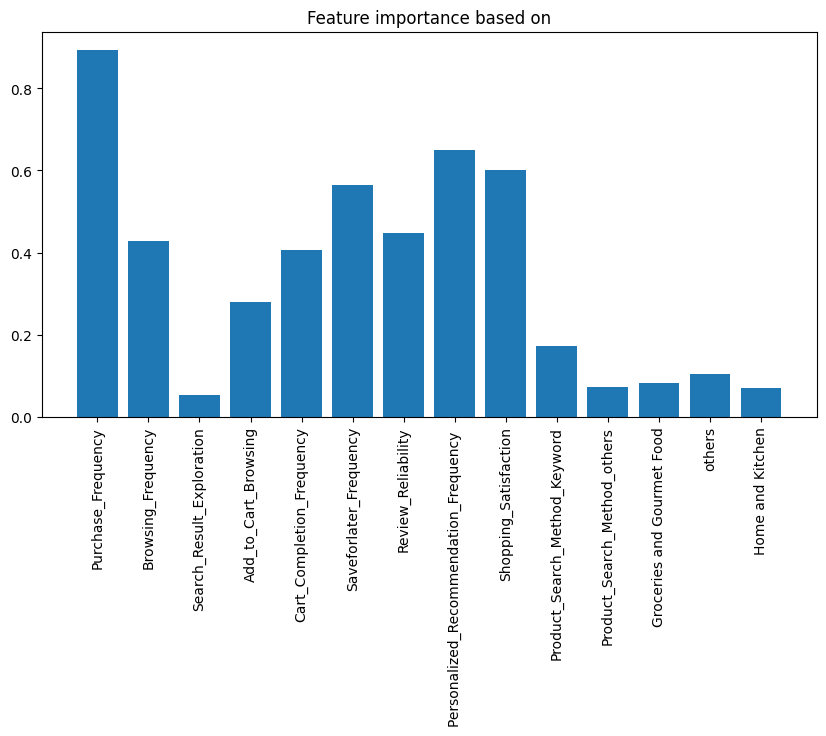

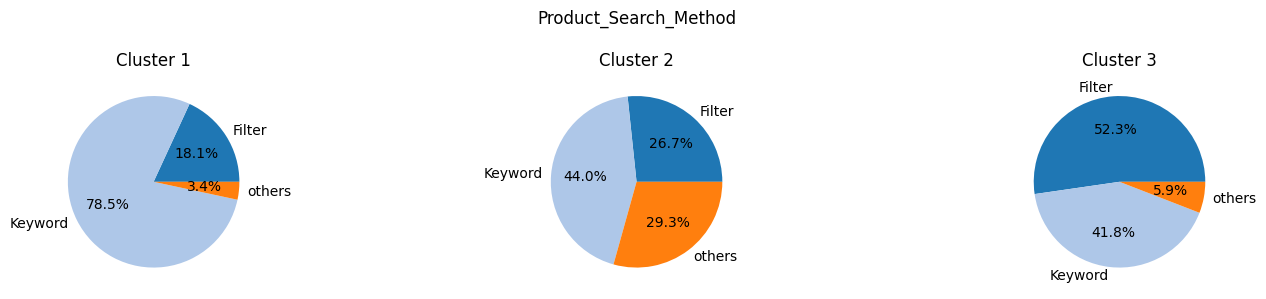

In [220]:
feature_importance = kmeans.cluster_centers_.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df_important.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on')
plt.show()


plot_cluster_pie_charts2(clusters, df_standardized, scaler,'Product_Search_Method', n_clusters)

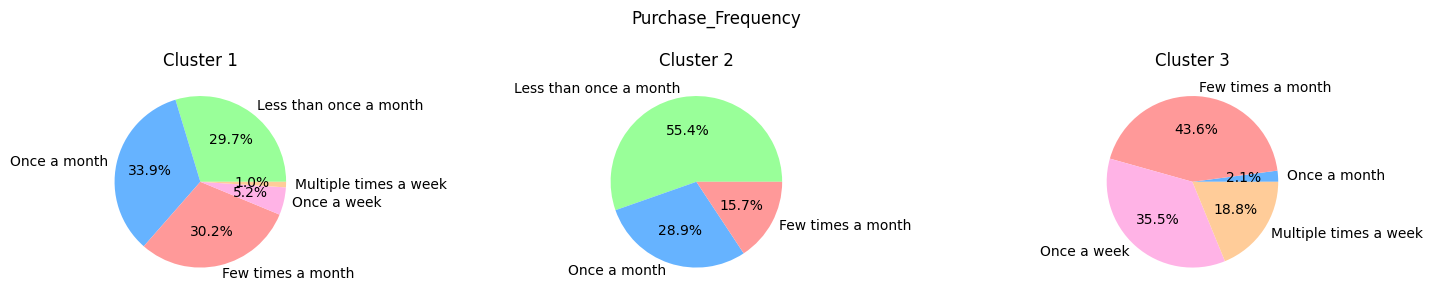

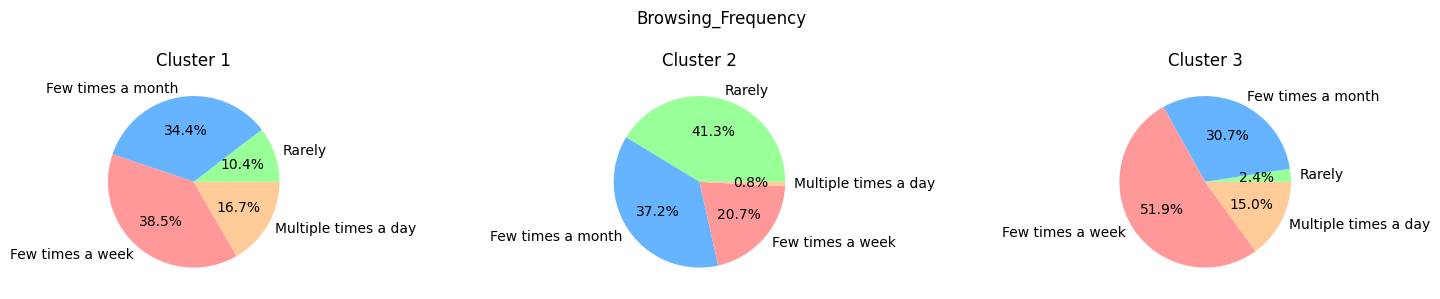

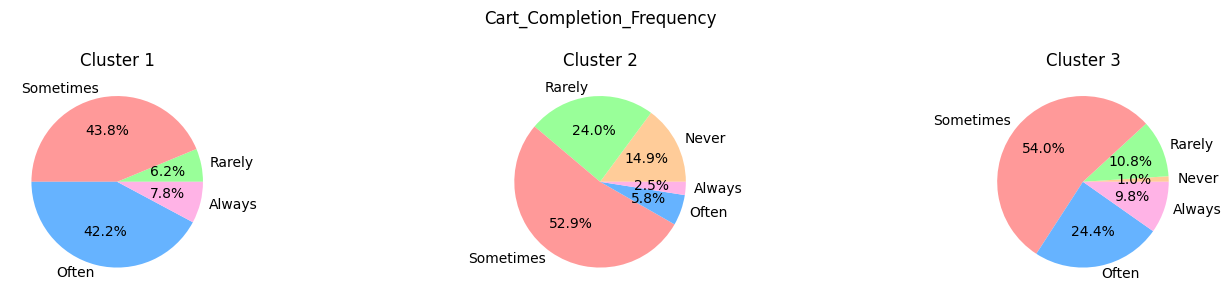

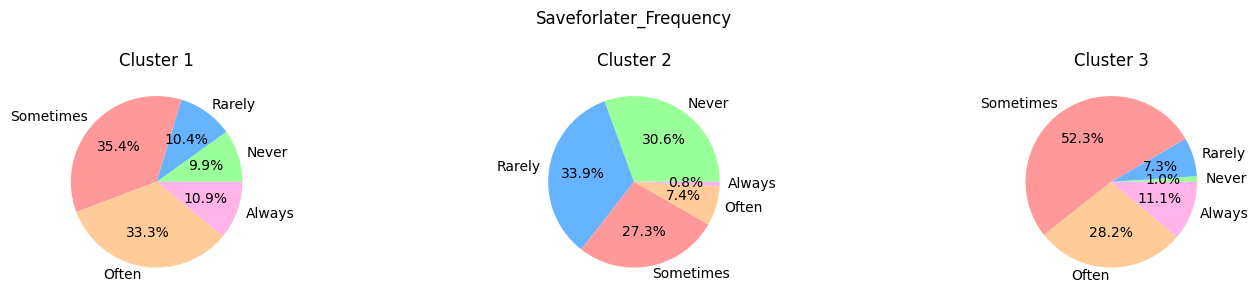

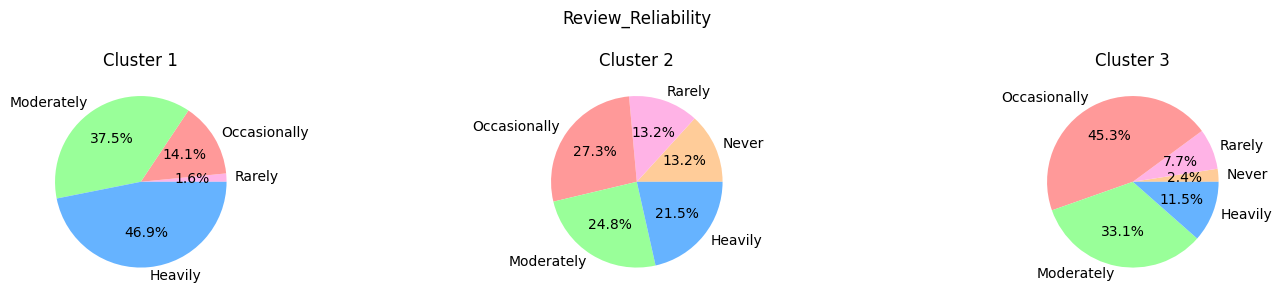

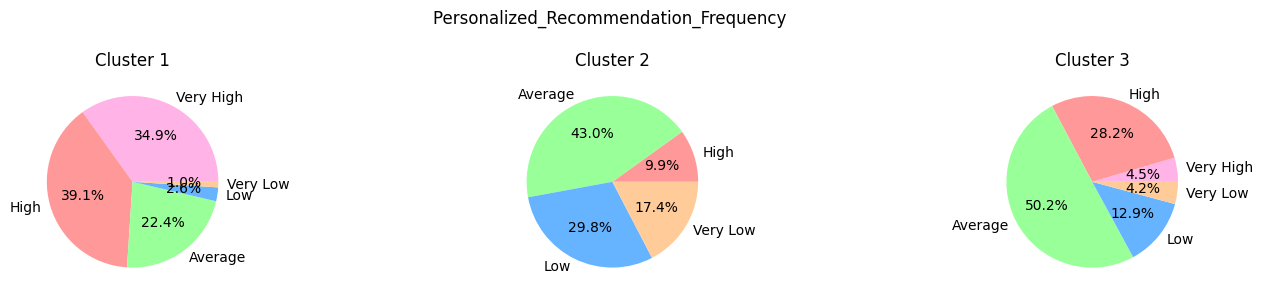

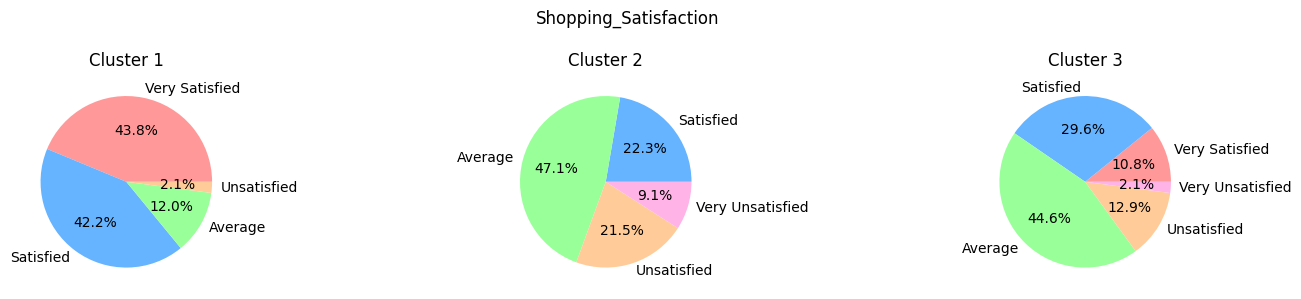

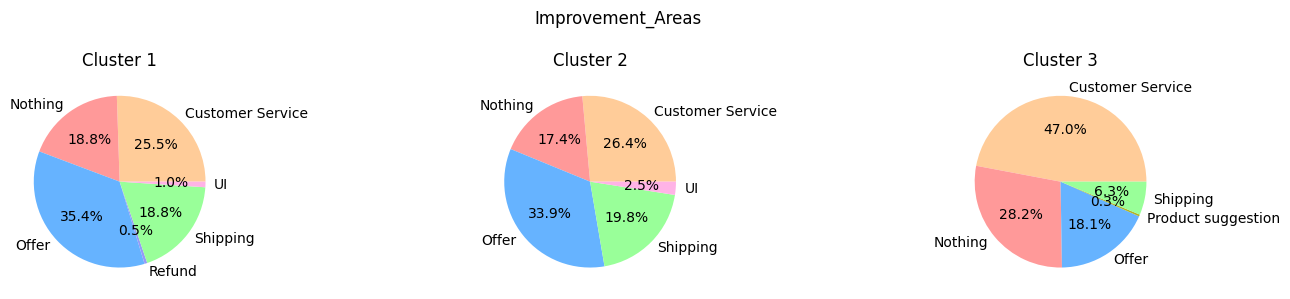

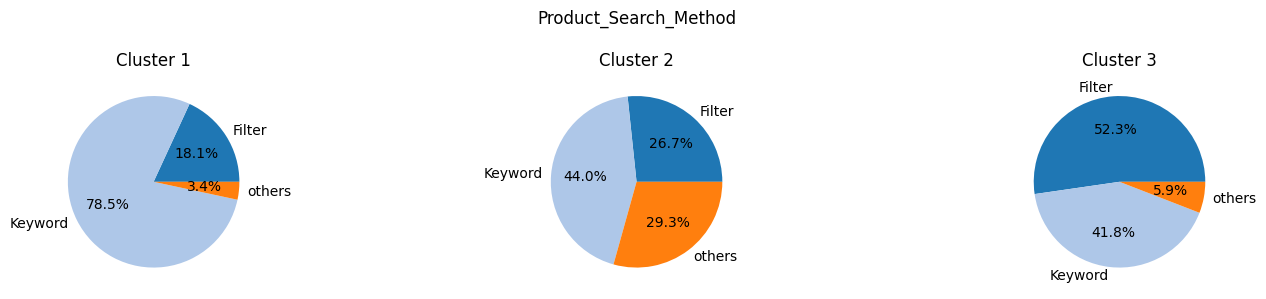

In [221]:
plot_cluster_pie_charts(clusters, df_standardized, scaler,'Purchase_Frequency',{'Few times a month': 2, 'Once a month': 1, 'Less than once a month': 0,
       'Multiple times a week': 4, 'Once a week': 3}, n_clusters)
plot_cluster_pie_charts(clusters, df_standardized, scaler,'Browsing_Frequency', {'Few times a week': 2, 'Few times a month': 1, 'Rarely': 0,
        'Multiple times a day': 3}, n_clusters)
plot_cluster_pie_charts(clusters, df_standardized, scaler,'Cart_Completion_Frequency', {'Sometimes': 2, 'Often': 3, 'Rarely': 1, 'Never': 0, 'Always': 4}, n_clusters)
plot_cluster_pie_charts(clusters, df_standardized, scaler,'Saveforlater_Frequency', {'Sometimes': 2, 'Often': 3, 'Rarely': 1, 'Never': 0, 'Always': 4}, n_clusters)
plot_cluster_pie_charts(clusters, df_standardized, scaler,'Review_Reliability', {'Occasionally': 2, 'Heavily': 4, 'Moderately': 3, 'Never': 0, 'Rarely': 1}, n_clusters)
plot_cluster_pie_charts(clusters, df_standardized, scaler,'Personalized_Recommendation_Frequency ', {"Very Low": 5, "Low": 4, "Average": 3, "High": 2, "Very High": 1 }, n_clusters)
plot_cluster_pie_charts(clusters, df_standardized, scaler,'Shopping_Satisfaction',{"Very Satisfied": 1, "Satisfied": 2, "Average": 3, "Unsatisfied": 4, "Very Unsatisfied": 5 }, n_clusters)
plot_cluster_pie_charts(clusters, df_standardized, scaler,'Improvement_Areas', label_mappings["Improvement_Areas"], n_clusters)
plot_cluster_pie_charts2(clusters, df_standardized, scaler,'Product_Search_Method', n_clusters)

In [222]:
# Klaster 1:  
    # Visok browing freq,
    # Visok review reliability,
    # Visok Personalized Recommendation Freq
    # Visok satisfaction
    # Kupci koji su generalno zadovoljni uslugama. Nuditi im popuste i povoljnije metode shipping-a. 
# Klaster 2:
    # nizak purchase freq
    # nizak browsing freq
    # Najnizi cart_complet freq
    # Znacajan broj nezadovoljnih korisnika
    # Znacajan udeo others u Product_Search_Method koloni
    # Nisu redovni kupci, cesto dolaze do proizvoda putem linkova drugih izvora.
    # Ne koriste dodatne funkcionalnosti site-a.
# Klaster 3:
    # Visok Purchase_Frequency
    # Visko Browsing_Frequency
    # Personalized Recommendation Freq nizi od Cluster-a 1
    # Nizi Shopping Satisfaction od Cluster-a 1
    # Redovni kupci, nedovoljno/lose targetirani personalizovanim marketingom.
    # Takodje u velikom broju nezadovoljni korisnickom podrskom.